In [66]:
# CS 451/551
# Coding Practice Session 1
# Last name: Guthrie
# Email: mbguthrie1@crimson.ua.edu
# Q1

import pandas as pd

data = {
    'Movies': ['The Minecraft Movie', 'KPop Demon Hunter', 'The Princess Bride', 'Haunted Mansion', 'The Lego Movie'], 
    'Likes': ['It was fun and lived up to the hype.', 'The music was fantastic.', 'The jokes and quips were hilarious.', 'It was much funnier and not scary like the original.', 'I liked the action and fun that comes from using legos.'], 
    'Dislikes': ['It didn\'t follow the game.' , 'I didn\'t like some of the animation styles, especially in some of the mushy scenes (Popcorn eyes).', 'Nothing, I think the entire movie is great.', 'I don\'t agree with the direction of some parts.', 'Some of the jokes were cheezy.'], 
}

df = pd.DataFrame(data)
df

,Movies,Likes,Dislikes
0,The Minecraft Movie,It was fun and lived up to the hype.,It didn't follow the game.
1,KPop Demon Hunter,The music was fantastic.,"I didn't like some of the animation styles, es..."
2,The Princess Bride,The jokes and quips were hilarious.,"Nothing, I think the entire movie is great."
3,Haunted Mansion,It was much funnier and not scary like the ori...,I don't agree with the direction of some parts.
4,The Lego Movie,I liked the action and fun that comes from usi...,Some of the jokes were cheezy.


In [67]:
# Q2
df['Movies'] = df['Movies'].str.replace(' ', '')
df['Likes'] = df['Likes'].str.replace('.', '').str.replace(',', '')
df['Dislikes'] = df['Dislikes'].str.replace('.', '').str.replace(',', '')
df

,Movies,Likes,Dislikes
0,TheMinecraftMovie,It was fun and lived up to the hype,It didn't follow the game
1,KPopDemonHunter,The music was fantastic,I didn't like some of the animation styles esp...
2,ThePrincessBride,The jokes and quips were hilarious,Nothing I think the entire movie is great
3,HauntedMansion,It was much funnier and not scary like the ori...,I don't agree with the direction of some parts
4,TheLegoMovie,I liked the action and fun that comes from usi...,Some of the jokes were cheezy


In [68]:
# Q3
df['Unique_Words_Count'] = df.apply(lambda x: len(set(str(x['Likes']).lower().split() + str(x['Dislikes']).lower().split())), axis=1)
df

,Movies,Likes,Dislikes,Unique_Words_Count
0,TheMinecraftMovie,It was fun and lived up to the hype,It didn't follow the game,12
1,KPopDemonHunter,The music was fantastic,I didn't like some of the animation styles esp...,17
2,ThePrincessBride,The jokes and quips were hilarious,Nothing I think the entire movie is great,13
3,HauntedMansion,It was much funnier and not scary like the ori...,I don't agree with the direction of some parts,18
4,TheLegoMovie,I liked the action and fun that comes from usi...,Some of the jokes were cheezy,16


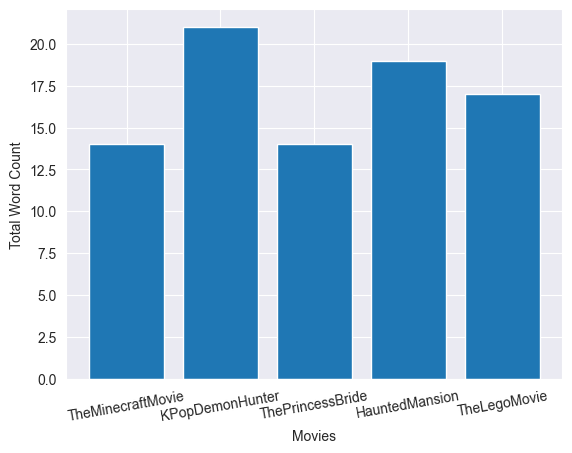

In [69]:
# Q4
import matplotlib.pyplot as plt
df['Total_Word_Count'] = df.apply(lambda row: len(str(row['Likes']).split()) + len(str(row['Dislikes']).split()), axis=1)

plt.bar(df['Movies'], df['Total_Word_Count'])
plt.xlabel('Movies')
plt.ylabel('Total Word Count')
plt.xticks(rotation=10)
plt.show()

In [70]:
# Q5
from sklearn.datasets import load_iris

iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


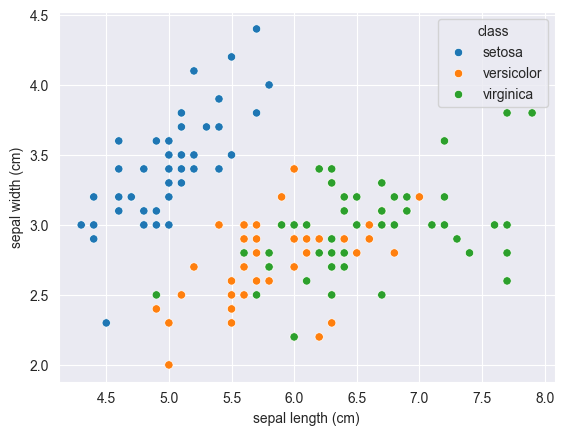

In [71]:
# Q6
import seaborn as sns

df_iris["class"] = iris.target
df_iris["class"] = df_iris["class"].map(dict(enumerate(iris.target_names)))

sns.scatterplot(
    data=df_iris,
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue="class",
    marker="o",
)

plt.show()

In [72]:
# Q7
numeric_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
summary_stats = df_iris[numeric_features].agg(['mean', 'median', 'std']).T
print(summary_stats)

                       mean  median       std
sepal length (cm)  5.843333    5.80  0.828066
sepal width (cm)   3.057333    3.00  0.435866
petal length (cm)  3.758000    4.35  1.765298
petal width (cm)   1.199333    1.30  0.762238


In [73]:
# Q8
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_iris[numeric_features])

df_scaled_scaled = pd.DataFrame(scaled_features, columns=numeric_features)
df_scaled_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [74]:
# Q9
sepal_petal_corr = df_iris['sepal length (cm)'].corr(df_iris['petal length (cm)'])
print(f"Correlation between sepal length and petal length: {sepal_petal_corr:.3f}")
corr_matrix = df_iris[numeric_features].corr()

print("\nCorrelation matrix of numeric features:")
corr_matrix

Correlation between sepal length and petal length: 0.872

Correlation matrix of numeric features:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [75]:
# Q10
from names_dataset import NameDataset, NameWrapper

nd = NameDataset()

print("Guthrie, mbguthrie1@crimson.ua.edu")
print(NameWrapper(nd.search('Maddox')).describe)

Guthrie, mbguthrie1@crimson.ua.edu
Male, United States
